Generating Fake Data

In [3]:
from sklearn.datasets._samples_generator import  make_regression 
X, y = make_regression(n_samples = 200, n_features = 1, n_informative = 1, noise = 6, bias = 30, random_state = 200) 
m = 200

Visualizing the Data

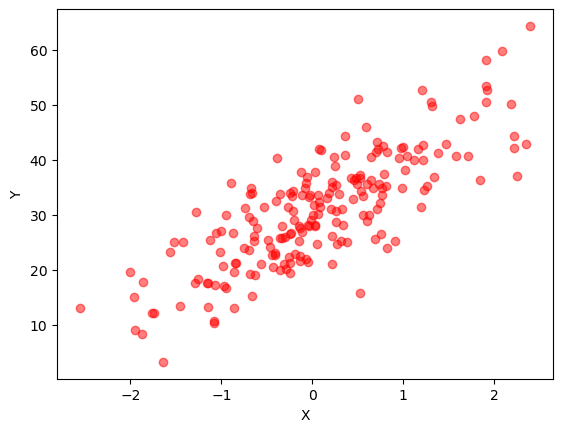

In [4]:
from matplotlib import pyplot as plt 
plt.scatter(X,y, c = "red", alpha=.5, marker = 'o') 
plt.xlabel("X") 
plt.ylabel("Y") 
plt.show() 

Linear Model 

In [5]:
import numpy as np 

# numpy speeds up the calculation using vectorized format - parallel computing 

def h(X,w):
    return (w[1]*np.array(X[:, 0])+w[0])

Cost Function

In [6]:
def cost(w, X, y):
    return (0.5/m)*np.sum(np.square(h(X,w)-np.array(y)))

Gradient Descent

In [7]:
def grad(w, X, y): 
    g = [0]*2 
    g[0] = (1/m)*np.sum(h(X,w)-np.array(y))
    g[1] = (1/m)*np.sum((h(X,w)-np.array(y))*np.array(X[:, 0]))
    return g

In [8]:
def descent(w_new, w_prev, lr): 
    print(w_prev)
    print(cost(w_prev, X, y)) 
    j = 0 
    while True: 
        w_prev = w_new 
        w0 = w_prev[0] - lr*grad(w_prev, X, y)[0] 
        w1 = w_prev[1] - lr*grad(w_prev, X, y)[1] 
        w_new = [w0, w1]
        print(w_new) 
        print(cost(w_new, X, y)) 
        if (w_new[0] - w_prev[0])**2 + (w_new[1]-w_prev[1])**2 <= pow(10,-6): 
            return w_new 
        if j > 500: 
            return w_new 
        j += 1 

Initializing Parameters 

In [9]:
w = [0, -1] 

Training the model 

In [12]:
w_new = descent(w,w,.1) 
print(w_new)

[0, -1]
540.5360663843456
[3.0956308633447547, 0.11442770988081663]
437.91139336428444
[5.873446610978822, 1.1023454281382854]
355.5039050187037
[8.366165526017987, 1.9778657783247602]
289.3267499184995
[10.603129563187093, 2.753547324958939]
236.1799750745718
[12.610653489037027, 3.440564026385428]
193.49509649539323
[14.412337853388406, 4.048856351454087]
159.2103901995911
[16.0293495446536, 4.587266032213945]
131.6708284668908
[17.480673291820082, 5.063656213710697]
109.54778810165583
[18.7833371265594, 5.485018573380515]
91.77462156224563
[19.952614505935692, 5.857568814053481]
77.49495508304668
[21.002205515744066, 6.186831784078626]
66.02119816099949
[21.944399323224108, 6.4777173436470505]
56.801246289923824
[22.79021982273288, 6.734587976310905]
49.39175789964725
[23.549556216205993, 6.961319037445921]
43.436706577550574
[24.23128008944935, 7.1613524356181975]
38.6501664442448
[24.843350383306017, 7.337744457271138]
34.802494555336104
[25.39290751357782, 7.493208368754656]
31.7

Visualizing the result 

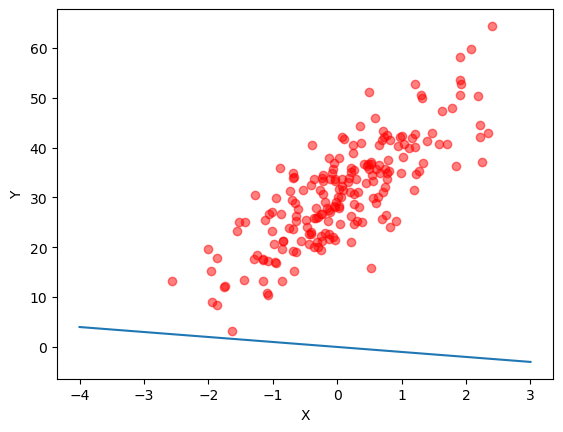

In [13]:
def graph(formula, x_range): 
    x = np.array(x_range) 
    y = formula(x) 
    plt.plot(x, y) 

def my_formula(x): 
    return w[0] + w[1]*x 

plt.scatter(X, y, c = 'red', alpha= .5, marker= 'o') 
graph(my_formula, range(-4,4)) 
plt.xlabel('X') 
plt.ylabel('Y') 
plt.show() 